# ***Section I: Extracting the atomic orbital contributions from ADF file***
The primary goal of this part will be to extract data from the calculated molecule regarding the most important SFO gross populations across all MOs. The name of the ADF output file is all that is needed for this section. This will eventually produce a *.text* file that you will need to use in ***Section II***.

In [56]:
%%shell

wd=$PWD
###
### things to change starts here ###

#name of the ADF output file
file_name="$wd/ex_b3lyp_dz_cd_sttft_18052407.out"

### things to change ends here ###
###

grep -A3 "SFO (first member)" "$file_name" > "$wd/first_line"
sed -i '1d' "$wd/first_line"
sed -i '1d' "$wd/first_line"
sed -i '1d' "$wd/first_line"

line_one="$(grep "" $wd/first_line)"
rm "$wd/first_line"

sed -n "/$line_one/,/^$/p" "$file_name" > "$wd/orbital_content_temp.text"

# ***Section II: Trim the output***
Use Excel to access the *.text* file after ***Section I*** and extract the data we need. In order to generate the *.csv* required in this step, utilize the ***atomic_orbital_contributor.xlsx*** Excel file! ***(click here to download >>> [atomic_orbital_contributor.xlsx](https://ksuemailprod-my.sharepoint.com/:x:/g/personal/sulalith_ksu_edu/EcytS_6pj8BOqMiQfkzcjTMB6I70kFiReyF8URfaF0bWXg?e=w7av3s))*** Using the *.csv* file in this section, you can accurately trim it and use it for the last section 😀.

In [57]:
%%shell

wd=$PWD
###
### things to change starts here ###

#name of the csv file
file_name="$wd/atomic_orbital_contributor.csv"

#number of orbitals to consider (+/-)
norbs=15

totalnorbs=$((norbs*2+2))
### things to change ends here ###
###

grep -A"$totalnorbs" "Orbital" "$file_name" > "bottom_trim.csv"
awk -F"," '{print $1","$2","$3","$4","$5","$6","$7","$8","$9","$10}' "bottom_trim.csv" > final.csv
rm "bottom_trim.csv"

Have a look at the data set before moving on to the final section 😀!

In [58]:
import csv
with open('final.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

['Orbital', 'Energy (eV)', 'Orbital #', 'Au(S)', 'Au(P)', 'Au(D)', 'S(P)', 'Br(P)', 'Sb(P)', 'Other']
['HOMO-15', '-6.48', '591', '9.57%', '0.00%', '17.00%', '18.93%', '13.41%', '0.00%', '41.09%']
['HOMO-14', '-6.451', '592', '2.52%', '0.00%', '13.13%', '29.05%', '6.21%', '1.70%', '47.39%']
['HOMO-13', '-6.388', '593', '4.14%', '0.00%', '11.40%', '11.41%', '37.79%', '0.00%', '35.26%']
['HOMO-12', '-6.341', '594', '1.46%', '0.00%', '16.69%', '35.49%', '12.47%', '1.36%', '32.53%']
['HOMO-11', '-6.299', '595', '0.00%', '0.00%', '18.22%', '3.86%', '32.24%', '3.83%', '41.85%']
['HOMO-10', '-6.234', '596', '3.24%', '0.00%', '11.60%', '19.44%', '34.04%', '0.00%', '31.68%']
['HOMO-9', '-6.197', '597', '1.09%', '0.00%', '16.17%', '6.64%', '37.69%', '3.23%', '35.18%']
['HOMO-8', '-6.141', '598', '1.33%', '0.00%', '16.15%', '9.02%', '28.06%', '1.39%', '44.05%']
['HOMO-7', '-6.108', '599', '7.29%', '0.00%', '27.57%', '19.08%', '10.73%', '0.00%', '35.33%']
['HOMO-6', '-6.015', '600', '4.97%', '0.00

# ***Section III: Atomic orbital contribution plot***
Using the data obtained from earlier sections, we will create the atomic orbital contribution plot ⚛️📈 in this section. The *final.csv* file is the only crucial document in this section. It's important to remember that, based on the results, you might need to make a few changes in this section (such as changing the arrow direction from one orbital to the next).

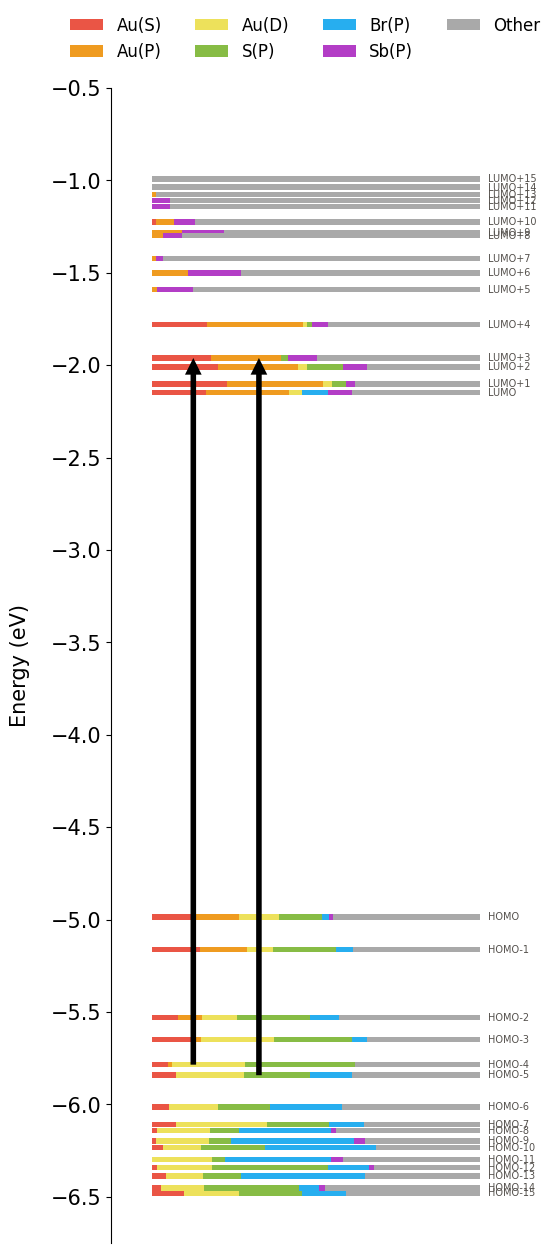

In [61]:
from pandas import *
import matplotlib.pyplot as plt
import numpy as np

#color palette-1:["#ea5545", "#f46a9b", "#ef9b20", "#edbf33", "#ede15b", "#bdcf32", "#87bc45", "#27aeef", "#b33dc6"]
#color palette-2:["#e60049", "#0bb4ff", "#50e991", "#e6d800", "#9b19f5", "#ffa300", "#dc0ab4", "#b3d4ff", "#00bfa0"]

# reading CSV file
data = read_csv("final.csv")

# converting column data to list
orbital = data['Orbital'].tolist()
energy = data['Energy (eV)'].tolist()
energy = [float(i) for i in energy]
orbital_num = data['Orbital #'].tolist()

ao1 = data['Au(S)'].tolist()
ao1 = [float(i.replace('%', '')) for i in ao1]
ao1 = np.array(ao1)

ao2 = data['Au(P)'].tolist()
ao2 = [float(i.replace('%', '')) for i in ao2]
ao2 = np.array(ao2)

ao3 = data['Au(D)'].tolist()
ao3 = [float(i.replace('%', '')) for i in ao3]
ao3 = np.array(ao3)

ao4 = data['S(P)'].tolist()
ao4 = [float(i.replace('%', '')) for i in ao4]
ao4 = np.array(ao4)

ao5 = data['Br(P)'].tolist()
ao5 = [float(i.replace('%', '')) for i in ao5]
ao5 = np.array(ao5)

ao6 = data['Sb(P)'].tolist()
ao6 = [float(i.replace('%', '')) for i in ao6]
ao6 = np.array(ao6)

ao7 = data['Other'].tolist()
ao7 = [float(i.replace('%', '')) for i in ao7]
ao7 = np.array(ao7)

#height of a single bar
barheight=0.03
#size of the figure (width,height)
fig, ax = plt.subplots(figsize=(5, 15))
#you can change the padding using the following line. default padding is 10.0%.
padding_y=float(12.50)
hbars=ax.barh(energy, padding_y, color="white", height=barheight, label='_nolegend_')
#step size of yticks
plt.yticks(np.arange(-7.00, 1.50, step=0.50),fontsize=15.0)
#limit of y axis
plt.ylim(-6.75,-0.5)
#name of y axis
plt.ylabel("Energy (eV)",labelpad=15.0, fontsize=15.0)

#names of the atomic orbitals
category_names = ['Au(S)','Au(P)','Au(D)','S(P)','Br(P)','Sb(P)','Other']

#assigning the atomic orbital contributions
hbars=ax.barh(energy, ao1, left=padding_y, color="#ea5545", height=barheight)
hbars=ax.barh(energy, ao2, left=padding_y+ao1, color="#ef9b20", height=barheight)
hbars=ax.barh(energy, ao3, left=padding_y+ao1+ao2, color="#ede15b", height=barheight)
hbars=ax.barh(energy, ao4, left=padding_y+ao1+ao2+ao3, color="#87bc45", height=barheight)
hbars=ax.barh(energy, ao5, left=padding_y+ao1+ao2+ao3+ao4, color="#27aeef", height=barheight)
hbars=ax.barh(energy, ao6, left=padding_y+ao1+ao2+ao3+ao4+ao5, color="#b33dc6", height=barheight)
hbars=ax.barh(energy, ao7, left=padding_y+ao1+ao2+ao3+ao4+ao5+ao6, color="darkgrey", height=barheight)

#selecting the axis-X making the bottom and top axes False.
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)

#selecting the axis-Y making the right and left axes False.
plt.tick_params(axis='y', which='both', right=False,
                left=True, labelleft=True)

#remove the outline border in the graph
for pos in ['right', 'top', 'bottom']:
    plt.gca().spines[pos].set_visible(False)

#add legends to the plot. <frameon=False> can remove the outline border in the legends
plt.legend(category_names, loc='upper center' , ncol=4, bbox_to_anchor=(0.5, 1.075), frameon=False, fontsize=12.0)

#add arrows to the graph. xy=(x_value_end,y_value_end); xytext=(x_value_start,y_value_start); arrow point will be pointing at xy coordinates
plt.annotate('',xy=(25.0,-1.961),xytext=(25.0,-5.785),arrowprops=dict(linewidth=0.0001, color='black'))
plt.annotate('',xy=(45.0,-1.961),xytext=(45.0,-5.842),arrowprops=dict(linewidth=0.0001, color='black'))

#adding the orbital name at the end of the bar
ax.bar_label(hbars, labels=[f'{e}' for e in orbital], padding=5.5, fontsize=7.0, color="#54504c")

plt.savefig('aoc.png',dpi=1080,bbox_inches='tight')